# Homework 1

## Instructions

First, ensure you have cloned the [course repository](https://github.com/lydiaYchen/DDL25Spring).

Then, open the [interactive notebook version](https://github.com/lydiaYchen/DDL25Spring/blob/main/lab/homework-1.ipynb) of this homework from your local copy.

For part A, fill in the code and answers within the notebook and save your changes.

For part B, create and archive the necessary Python/shell scripts together.

Finally, upload the notebook and the archive to the assignment in ILIAS.

## Part A (12 points)

### Note

When not otherwise specified, use the following parameter values in experiment runs:
- `nr_clients` (N): 100
- `lr`: 0.01
- `client_fraction` (C): 0.1
- `nr_local_epochs` (E): 1
- `batch_size` (B): 100
- `nr_rounds`: 10
- `iid`: True

For all exercises, pass `seed = 10` to calls for splitting data, server initialization, or plotting.

In [1]:
import pandas as pd
import seaborn as sns
from tutorial_1a.hfl_complete import *

n = 100
lr = 0.01
c = 0.1
e = 1
b = 100
nr_rounds = 10
iid = True
seed = 10

### Exercise A1: FedSGD with weights (3 points)

#### Question

_(2 points)_ Implement a version of FedSGD that uses weights in its updates, like FedAvg, instead of the gradients from the version of the tutorials. The two FedSGD versions should have the same test accuracy after each round (with a tolerance of up to around 0.1%). To show this, compare their output for the following two scenarios over *5 rounds*:
- `lr = 0.01, client_subsets = split(100, True, ...), client_fraction = 0.5`
- `lr = 0.1, client_subsets = split(50, False, ...), client_fraction = 0.2`

*Tip:* You can use the existing FedAvg implementation to minimize the amount of code writing required.

_(1 point)_ Explain in which cases (for the different decentralized data learning parameters) weight and gradient FedSGD are equivalent.

#### Answer

In [2]:
%run tutorial_1a/hfl_complete.py

In [ ]:
lr = 0.01
sample_split = split(100, True, seed)
batch_size = len(train_dataset) # Keeping batch size so that each client trains on the whole data chunk in a single go

fedavg_server = FedAvgServer(lr, batch_size, sample_split, 0.5, e, seed)
result_fedavg = fedavg_server.run(5)
fedavg_df = result_fedavg.as_df()
print("Results from FedAvg:")
print(fedavg_df)

fedsgd_gradient_server = FedSgdGradientServer(lr, sample_split, 0.5, seed)
result_fedsgd_gradient = fedsgd_gradient_server.run(5)
fedsgd_gradient_df = result_fedsgd_gradient.as_df()
print("Results from FedSGD:")
print(fedsgd_gradient_df)

In [ ]:
lr = 0.1
sample_split = split(50, True, seed)
batch_size = len(train_dataset) # Keeping batch size so that each client trains on the whole data chunk in a single go

fedavg_server = FedAvgServer(lr, batch_size, sample_split, 0.2, e, seed)
result_fedavg = fedavg_server.run(5)
fedavg_df = result_fedavg.as_df()
print("Results from FedAvg:")
print(fedavg_df)

fedsgd_gradient_server = FedSgdGradientServer(lr, sample_split, 0.2, seed)
result_fedsgd_gradient = fedsgd_gradient_server.run(5)
fedsgd_gradient_df = result_fedsgd_gradient.as_df()
print("Results from FedSGD:")
print(fedsgd_gradient_df)

In which cases weight and gradient FedSGD are equivalent?

If clients only train for a single step and send weights instead of gradients, weight FedSGD is still effectively gradient FedSGD with weight updates instead of gradient updates.
Also, the whole data should be trained as a single batch provided to a client.

### Exercise A2: Client number & fraction (4 points)

#### Question

_(2 points)_ Run the necessary experiments to fill in the following table showing the final message count and test accuracy of FedSGD and FedAvg for different total client numbers:

| Algorithm | N   | C   | Message count | Test accuracy |
| --------- | --- | --- | ------------- | ------------- |
| FedSGD    | 10  | 0.1 |               |               |
| FedAvg    | 10  | 0.1 |               |               |
| FedSGD    | 50  | 0.1 |               |               |
| FedAvg    | 50  | 0.1 |               |               |
| FedSGD    | 100 | 0.1 |               |               |
| FedAvg    | 100 | 0.1 |               |               |

Is the relationship between the metrics/algorithms and client numbers monotonous? Briefly explain your reasoning.

_(2 points)_ Run the experiments to fill in the table when varying the fraction of clients used in every round:

| Algorithm | N   | C    | Message count | Test accuracy |
| --------- | --- | ---- | ------------- | ------------- |
| FedSGD    | 100 | 0.01 |               |               |
| FedAvg    | 100 | 0.01 |               |               |
| FedSGD    | 100 | 0.1  |               |               |
| FedAvg    | 100 | 0.1  |               |               |
| FedSGD    | 100 | 0.2  |               |               |
| FedAvg    | 100 | 0.2  |               |               |

How do the observed relationships compare to before? Again, succintly argue your answer.

#### Answer

In [ ]:


client_fraction = 0.1
num_servers_list = [10, 50, 100]
lr = 0.01
e = 1
seed = 10
b = 100

for num_servers in num_servers_list:
    sample_split = split(num_servers, True, seed)
    fedavg_server = FedAvgServer(lr, b, sample_split, client_fraction, e, seed)
    result_fedavg = fedavg_server.run(5)
    fedavg_df = result_fedavg.as_df()
    print(f"For N = {num_servers}, the results from FedAvg are:")
    print(fedavg_df.loc[4])

    fedsgd_gradient_server = FedSgdGradientServer(lr, sample_split, client_fraction, seed)
    result_fedsgd_gradient = fedsgd_gradient_server.run(5)
    fedsgd_gradient_df = result_fedsgd_gradient.as_df()
    print(f"For N = {num_servers}, the results from FedSGD are:")
    print(fedsgd_gradient_df.loc[4])

For N = 10, the results from FedAvg are:
Round                 5
Algorithm        FedAvg
N                    10
C                   0.1
B                   100
E                     1
η                  0.01
Seed                 10
Message count        10
Test accuracy     91.18
Name: 4, dtype: object


For N = 10, the results from FedSGD are:
Round                         5
Algorithm        FedSGDGradient
N                            10
C                           0.1
B                             ∞
E                             1
η                          0.01
Seed                         10
Message count                10
Test accuracy              27.4
Name: 4, dtype: object


For N = 50, the results from FedAvg are:
Round                 5
Algorithm        FedAvg
N                    50
C                   0.1
B                   100
E                     1
η                  0.01
Seed                 10
Message count        50
Test accuracy      81.4
Name: 4, dtype: object


For N = 50, the results from FedSGD are:
Round                         5
Algorithm        FedSGDGradient
N                            50
C                           0.1
B                             ∞
E                             1
η                          0.01
Seed                         10
Message count                50
Test accuracy             27.46
Name: 4, dtype: object


For N = 100, the results from FedAvg are:
Round                 5
Algorithm        FedAvg
N                   100
C                   0.1
B                   100
E                     1
η                  0.01
Seed                 10
Message count       100
Test accuracy      69.8
Name: 4, dtype: object


For N = 100, the results from FedSGD are:
Round                         5
Algorithm        FedSGDGradient
N                           100
C                           0.1
B                             ∞
E                             1
η                          0.01
Seed                         10
Message count               100
Test accuracy             27.38
Name: 4, dtype: object


| Algorithm | N   | C   | Message count | Test accuracy |
| --------- | --- | --- | ------------- | ------------- |
| FedSGD    | 10  | 0.1 |     10        |      27.40    |
| FedAvg    | 10  | 0.1 |     10        |      91.18    |
| FedSGD    | 50  | 0.1 |     50        |      27.46    |
| FedAvg    | 50  | 0.1 |     50        |      81.40    |
| FedSGD    | 100 | 0.1 |     100       |      27.38    |
| FedAvg    | 100 | 0.1 |     100       |      69.80    |

No, the relationship between the metrics (test accuracy and message count) and the number of clients (N) is not strictly monotonous for both FedSGD and FedAvg.

1.	FedSGD’s Test Accuracy does not change with N (~27%)
- Regardless of the number of clients (N = 10, 50, 100), the test accuracy remains nearly the same (~27.4%).
- This suggests that increasing the number of clients does not improve performance in FedSGD.
2.	FedAvg’s Test Accuracy Decreases as N Increases
- FedAvg achieves 91.18% accuracy for N = 10, but accuracy drops to 81.40% for N = 50, and further down to 69.80% for N = 100.
- This shows that FedAvg does not have a strictly increasing (monotonous) relationship with N; instead, accuracy declines as more clients participate.
3.	Message Count is Monotonically Increasing
- Message count is always equal to N, meaning it increases linearly with the number of clients.

In [5]:
client_fraction_list = [0.01, 0.1, 0.2]
num_servers = 100
sample_split = split(num_servers, True, seed)
lr = 0.01
e = 1
seed = 10
b = 100

for client_fraction in client_fraction_list:
    fedavg_server = FedAvgServer(lr, b, sample_split, client_fraction, e, seed)
    result_fedavg = fedavg_server.run(5)
    fedavg_df = result_fedavg.as_df()
    print(f"For N = {num_servers}, the results from FedAvg are:")
    print(fedavg_df.loc[4])

    fedsgd_gradient_server = FedSgdGradientServer(lr, sample_split, client_fraction, seed)
    result_fedsgd_gradient = fedsgd_gradient_server.run(5)
    fedsgd_gradient_df = result_fedsgd_gradient.as_df()
    print(f"For N = {num_servers}, the results from FedSGD are:")
    print(fedsgd_gradient_df.loc[4])

For N = 100, the results from FedAvg are:
Round                 5
Algorithm        FedAvg
N                   100
C                  0.01
B                   100
E                     1
η                  0.01
Seed                 10
Message count        10
Test accuracy     64.96
Name: 4, dtype: object


For N = 100, the results from FedSGD are:
Round                         5
Algorithm        FedSGDGradient
N                           100
C                          0.01
B                             ∞
E                             1
η                          0.01
Seed                         10
Message count                10
Test accuracy             27.92
Name: 4, dtype: object


For N = 100, the results from FedAvg are:
Round                 5
Algorithm        FedAvg
N                   100
C                   0.1
B                   100
E                     1
η                  0.01
Seed                 10
Message count       100
Test accuracy      69.8
Name: 4, dtype: object


For N = 100, the results from FedSGD are:
Round                         5
Algorithm        FedSGDGradient
N                           100
C                           0.1
B                             ∞
E                             1
η                          0.01
Seed                         10
Message count               100
Test accuracy             27.38
Name: 4, dtype: object


For N = 100, the results from FedAvg are:
Round                 5
Algorithm        FedAvg
N                   100
C                   0.2
B                   100
E                     1
η                  0.01
Seed                 10
Message count       200
Test accuracy     65.14
Name: 4, dtype: object


For N = 100, the results from FedSGD are:
Round                         5
Algorithm        FedSGDGradient
N                           100
C                           0.2
B                             ∞
E                             1
η                          0.01
Seed                         10
Message count               200
Test accuracy             27.42
Name: 4, dtype: object



| Algorithm | N   | C    | Message count | Test accuracy |
| --------- | --- | ---- | ------------- | ------------- |
| FedSGD    | 100 | 0.01 |     10        |     27.92     |
| FedAvg    | 100 | 0.01 |     10        |     64.96     |
| FedSGD    | 100 | 0.1  |     100       |     27.38     |
| FedAvg    | 100 | 0.1  |     100       |     69.80     |
| FedSGD    | 100 | 0.2  |     200       |     27.42     |
| FedAvg    | 100 | 0.2  |     200       |     65.14     |

1.	FedSGD’s Test Accuracy Remains Constant (~27%)
- Similar to the previous table, FedSGD’s accuracy does not improve with increasing C (fraction of clients participating per round).
- This indicates that FedSGD does not benefit from more clients participating per round, likely due to high variance in gradient updates.
2.	FedAvg’s Test Accuracy Initially Increases, then Decreases
- When C = 0.01, accuracy is 64.96%.
- When C = 0.1, accuracy improves to 69.80%.
- When C = 0.2, accuracy drops again to 65.14%.
- This follows a non-monotonic trend similar to the previous table, where increasing participation does not always lead to better accuracy.
3.	Message Count Increases Linearly with C
- Since Message Count = N × C, increasing C leads to proportional increases in communication.

The trends we see using this table and the previous table, further confirms that FedAvg is more effective than FedSGD, but too many participating clients may harm accuracy due to increased variance in updates.

### Exercise A3: Local epoch count & (non-)IID data (5 points)

#### Question

_(1 point)_ Create a line plot of the accuracy after each round for the following algorithm variants:

- FedSGD
- FedAvg (E=1)
- FedAvg (E=2)
- FedAvg (E=4)

How does FedAvg compare to FedSGD? What is the effect of increasing the work clients perform locally for each update in FedAvg?

_(2 points)_ Make one line plot of FedSGD and FedAvg under an IID and non-IID split for 15 rounds (leaving all other parameter values as they previously mentioned default). How does the non-IID setting affect the accuracy achieved by the two algorithms? What is the difference in terms of the smoothness of learning?

_(2 points)_ Make another plot for only non-IID splits, including the FedSGD and FedAvg configs from the point above, and add a version for each with a learning rate of 0.001 and client fraction of 0.5. How does the stability of the new variants compare to the ones from before? Why do the changes in parameters have the observed effect?

#### Answer

In [7]:
n = 100
lr = 0.01
c = 0.1
b = 100
nr_rounds = 10
iid = True
seed = 10
sample_split = split(n, True, seed)

# - SGD
fedsgd_gradient_server = FedSgdGradientServer(lr, sample_split, c, seed)
result_fedsgd_gradient = fedsgd_gradient_server.run(5)
fedsgd_gradient_df = result_fedsgd_gradient.as_df()
fedsgd_gradient_accuracies = list(fedsgd_gradient_df['Test accuracy'])


# - FedAvg (E=1)
e = 1
fedavg_server_1epochs = FedAvgServer(lr, b, sample_split, c, e, seed)
result_fedavg_1epochs = fedavg_server_1epochs.run(5)
fedavg_1epochs_df = result_fedavg_1epochs.as_df()
fedavg_1epochs_accuracies = list(fedavg_1epochs_df['Test accuracy'])

# - FedAvg (E=2)
e = 2
fedavg_server_2epochs = FedAvgServer(lr, b, sample_split, c, e, seed)
result_fedavg_2epochs = fedavg_server_2epochs.run(5)
fedavg_2epochs_df = result_fedavg_2epochs.as_df()
fedavg_2epochs_accuracies = list(fedavg_2epochs_df['Test accuracy'])

# - FedAvg (E=4)
e = 4
fedavg_server_4epochs = FedAvgServer(lr, b, sample_split, c, e, seed)
result_fedavg_4epochs = fedavg_server_4epochs.run(5)
fedavg_4epochs_df = result_fedavg_4epochs.as_df()
fedavg_4epochs_accuracies = list(fedavg_4epochs_df['Test accuracy'])


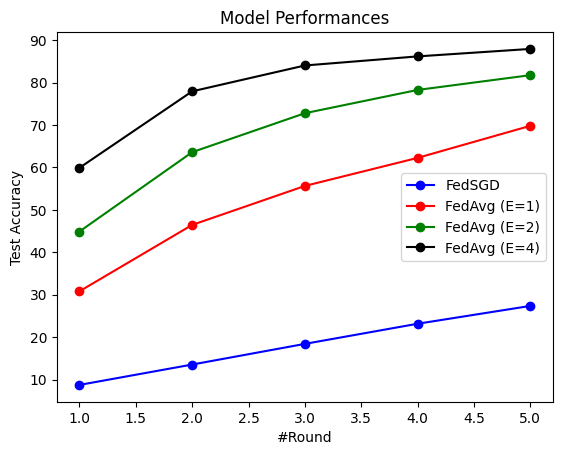

In [13]:
import matplotlib.pyplot as plt


model_accuracies_assembled = [fedsgd_gradient_accuracies, fedavg_1epochs_accuracies, fedavg_2epochs_accuracies, fedavg_4epochs_accuracies]

# Define colors for each line
colors = ['blue', 'red', 'green', 'black']
labels = ['FedSGD', 'FedAvg (E=1)', 'FedAvg (E=2)', 'FedAvg (E=4)']

# Plot each list as a separate line
for i, accuracies in enumerate(model_accuracies_assembled):
    plt.plot([1, 2, 3, 4, 5], accuracies, marker='o', linestyle='-', color=colors[i], label=labels[i])

# Labels and title
plt.xlabel('#Round')
plt.ylabel('Test Accuracy')
plt.title('Model Performances')

# Show legend
plt.legend()

# Show plot
plt.show()

- FedAvg clearly is an improvement over FedSGD, as we can see we cab achieve a higher accuracy early in our experiment
- When we increased local epochs for work clients, we see a sudden improvement in accuracy starting from the first round itself. Also, we see accuracy converging at a higher value in case when local epochs were higher (e=4) in comparision to ones with lesser local epochs (e=1)

In [4]:
n = 100
lr = 0.01
c = 0.1
b = 100
nr_rounds = 15
seed = 10
e = 1


# - SGD IID
sample_split = split(n, True, seed)
fedsgd_gradient_IID_server = FedSgdGradientServer(lr, sample_split, c, seed)
result_fedsgd_gradient_IID = fedsgd_gradient_IID_server.run(nr_rounds)
fedsgd_gradient_IID_df = result_fedsgd_gradient_IID.as_df()
fedsgd_gradient_IID_accuracies = list(fedsgd_gradient_IID_df['Test accuracy'])

# - FedAvg IID
sample_split = split(n, True, seed)
fedavg_IID_server = FedAvgServer(lr, b, sample_split, c, e, seed)
result_fedavg_IID = fedavg_IID_server.run(nr_rounds)
fedavg_IID_df = result_fedavg_IID.as_df()
fedavg_IID_accuracies = list(fedavg_IID_df['Test accuracy'])

# - SGD non-IID
sample_split = split(n, False, seed)
fedSGD_nonIID_server = FedSgdGradientServer(lr, sample_split, c, seed)
result_fedSGD_nonIID = fedSGD_nonIID_server.run(nr_rounds)
fedSGD_nonIID_df = result_fedSGD_nonIID.as_df()
fedSGD_nonIID_accuracies = list(fedSGD_nonIID_df['Test accuracy'])

# - FedAvg non-IID
sample_split = split(n, False, seed)
fedavg_nonIID_server = FedAvgServer(lr, b, sample_split, c, e, seed)
result_fedavg_nonIID = fedavg_nonIID_server.run(nr_rounds)
fedavg_nonIID_df = result_fedavg_nonIID.as_df()
fedavg_nonIID_accuracies = list(fedavg_nonIID_df['Test accuracy'])

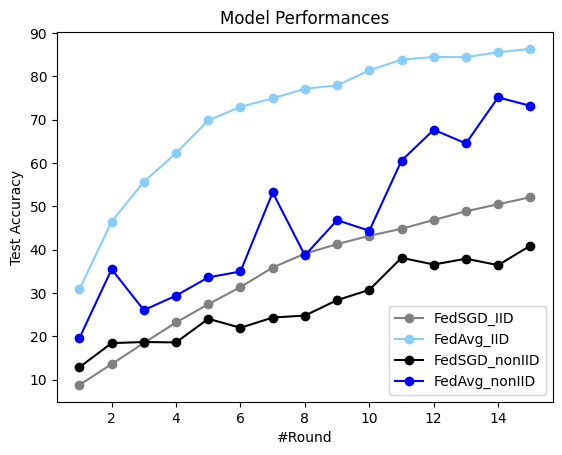

In [6]:
import matplotlib.pyplot as plt


model_accuracies_assembled = [fedsgd_gradient_IID_accuracies, fedavg_IID_accuracies, fedSGD_nonIID_accuracies, fedavg_nonIID_accuracies]

# Define colors for each line
colors = ['grey', 'lightskyblue', 'black', 'blue']
labels = ['FedSGD_IID', 'FedAvg_IID', 'FedSGD_nonIID', 'FedAvg_nonIID']

# Plot each list as a separate line
for i, accuracies in enumerate(model_accuracies_assembled):
    plt.plot([i for i in range(1, 16)], accuracies, marker='o', linestyle='-', color=colors[i], label=labels[i])

# Labels and title
plt.xlabel('#Round')
plt.ylabel('Test Accuracy')
plt.title('Model Performances')

# Show legend
plt.legend()

# Show plot
plt.show()

How does the non-IID setting affect the accuracy achieved by the two algorithms? What is the difference in terms of the smoothness of learning?

While you can see the overall trend of accuracy increasing for the non-IID setting, the pattern of increase is not smooth at all. There are sudden peaks and sudden drops in the test accuracy.
Also, we can see that we achieve higher accuracy with less rounds in the IID case while the non-IID case is taking more rounds to reach to that kind of accuracy.
In terms of smoothness, it is very clear that the IID case has a pretty smooth curve while the non-IID case has sudden peaks and drops. Also, the convergence is not so clear for the non-IID case.

In [3]:
n = 100
lr = 0.001
c = 0.5
b = 100
nr_rounds = 15
seed = 10
e = 1

# - SGD non-IID
sample_split = split(n, False, seed)
fedSGD_nonIID_server = FedSgdGradientServer(lr, sample_split, c, seed)
result_fedSGD_nonIID = fedSGD_nonIID_server.run(nr_rounds)
fedSGD_nonIID_df = result_fedSGD_nonIID.as_df()
fedSGD_nonIID_accuracies = list(fedSGD_nonIID_df['Test accuracy'])

# - FedAvg non-IID
sample_split = split(n, False, seed)
fedavg_nonIID_server = FedAvgServer(lr, b, sample_split, c, e, seed)
result_fedavg_nonIID = fedavg_nonIID_server.run(nr_rounds)
fedavg_nonIID_df = result_fedavg_nonIID.as_df()
fedavg_nonIID_accuracies = list(fedavg_nonIID_df['Test accuracy'])

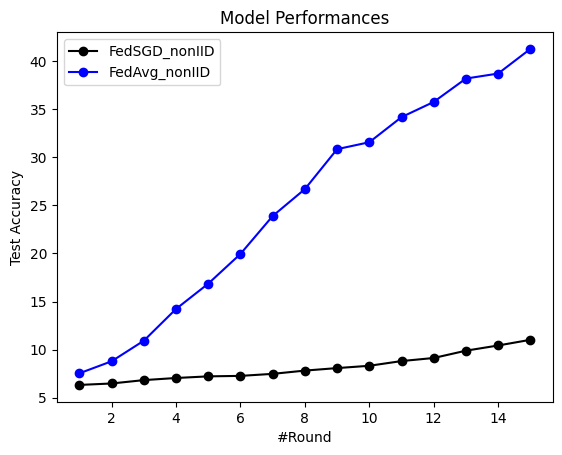

In [4]:
import matplotlib.pyplot as plt


model_accuracies_assembled = [fedSGD_nonIID_accuracies, fedavg_nonIID_accuracies]

# Define colors for each line
colors = ['black', 'blue']
labels = ['FedSGD_nonIID', 'FedAvg_nonIID']

# Plot each list as a separate line
for i, accuracies in enumerate(model_accuracies_assembled):
    plt.plot([i for i in range(1, 16)], accuracies, marker='o', linestyle='-', color=colors[i], label=labels[i])

# Labels and title
plt.xlabel('#Round')
plt.ylabel('Test Accuracy')
plt.title('Model Performances')

# Show legend
plt.legend()

# Show plot
plt.show()

 How does the stability of the new variants compare to the ones from before? Why do the changes in parameters have the observed effect?

This new varient using smaller value of learning rate seems to result in a smoother curve, leading us to understand that there is more stability in this version than the previous experiment where lr was 0.1. This effect is caused due to the fact that when we keep a smaller learning rate, the deviation of weights/gradients from the previous iteration wouldn't be very high, hence, while averaging the weights/gradients provided by each client we would not deviate a lot. Hence, the smoother curve.

## Part B (12 points)

### Exercise B1: Microbatch Pipeline Model Parallelism (7 points)

Implement pipeline parallelism with microbatches, as discussed during the lab.

As with the other data/model parallelism examples, you will need a Python script for the nodes and a shell script to orchestrate execution.

Be aware of the possibility of deadlocks: due to how `gloo` operates, it is possible to deadlock by having device 1 send $B_2$ to device 2 in the forward pass, and simultaneously, device 2 send $B_1$ in the backward pass.
Since both sends will await corresponding receives, the training will stop indefinitely.

Use `isend` & `irecv`, the asynchronous (non-blocking) versions of `send` & `recv` in `torch.distributed`.
Each call of the two function returns a `Work` object, on which calling `wait()` blocks, if needed, until the message exchange finishes.
Add comments or text explaining how you expect your implementation to work and test that it runs for the same number of steps and model architecture as in class.

Note that `torch.distributed`'s implementation of `gloo` does not currently support properly asynchronous communication even when using the corresponding primitives.
Thus, you will not see the same improvements in speed as with a backend like `nccl`.

You may also use the fact that `torch` gradients naturally accumulate if zeroed out.
Also, scaling the loss by a constant is equivalent to scaling the resulting gradients by the same constant.

You can rely on receiving messages in the same order they get sent between any device pair.
The `(i)send/recv` functions all support a `tag` attribute to match messages explicitly.
Although using it is good practice, it is not required.

You can refer to the [documentation](https://pytorch.org/docs/stable/distributed.html) and, if helpful, a related [tutorial](https://brsoff.github.io/tutorials/intermediate/dist_tuto.html) on the PyTorch website.

### Exercise B2: Joint Data & Model Parallelism (5 points)

Implement a training setup that uses data and model parallelism together.

Create 2 pipelines of 3 stages running sequentially, where each stage works with 3 sequential micro-batches.

Once again, add comments or text explaining your implementation and test it on the setting that mimics those from the class.

You can use groups from `torch.distributed` to handle operations that require interaction between a subset of more than two but less than all workers.